In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from tensorflow.keras.datasets import mnist

In [40]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
y_train.shape

(60000,)

In [43]:
x_test.shape

(10000, 28, 28)

In [44]:
y_test.shape

(10000,)

### Sccaling th data

In [45]:
x_train = x_train/255

In [46]:
x_test = x_test/255

## Onrh ot encode the labels 

In [61]:
from tensorflow.keras.utils import to_categorical

In [62]:
y_train_cat = to_categorical(y_train, num_classes= 10)

In [63]:
y_test_cat = to_categorical(y_test, num_classes= 10)

In [73]:
y_test_cat.shape

(10000, 10)

In [75]:
y_train_cat.shape

(60000, 10)

## Need to add the color dimansion to the training and testing data 

In [76]:
x_test = x_test.reshape(10000, 28, 28,1)

In [77]:
x_train = x_train.reshape(60000, 28, 28,1)

In [78]:
x_test.shape

(10000, 28, 28, 1)

In [79]:
x_train.shape

(60000, 28, 28, 1)

### We cna now create out model totrain the data
- 1 color dimension indicates a black and white image (grey style)

In [80]:
y_test.shape

(10000,)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Conv2D
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=2)

In [83]:
model  = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4), padding = "valid", 
                 input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

### Fitting Model

In [85]:
model.fit(x_train,y_train_cat, validation_data = (x_test,y_test_cat), epochs=10, callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 191s 3ms/sample - loss: 0.1467 - accuracy: 0.9553 - val_loss: 0.0549 - val_accuracy: 0.9833
Epoch 2/10
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.0496 - accuracy: 0.9848 - val_loss: 0.0417 - val_accuracy: 0.9867
Epoch 3/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0369 - val_accuracy: 0.9869
Epoch 4/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0400 - val_accuracy: 0.9871
Epoch 5/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0476 - val_accuracy: 0.9856


In [87]:
metrics = pd.DataFrame(model.history.history)

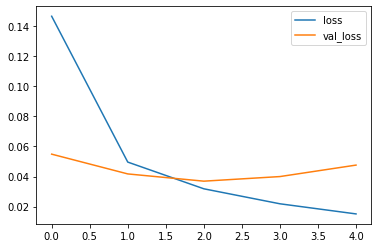

In [89]:
metrics[["loss","val_loss"]].plot()

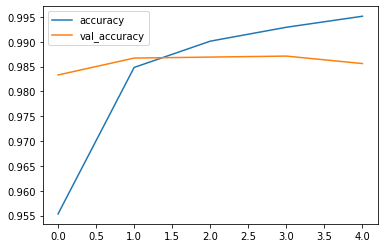

In [92]:
metrics[["accuracy", "val_accuracy"]].plot()

In [94]:
predictions = model.predict_classes(x_test)

In [95]:
from sklearn.metrics import explained_variance_score, classification_report, confusion_matrix

In [96]:
print(confusion_matrix(predictions,y_test))

[[ 975    0    2    0    0    1    6    1    6    1]
 [   0 1128    1    0    0    0    1    1    1    0]
 [   0    1 1003    1    1    0    0    2    1    0]
 [   1    0    6 1006    0    9    0    0    6    8]
 [   0    1    3    0  971    0    5    0    1    5]
 [   0    0    0    0    0  879    2    0    3    3]
 [   3    2    1    0    3    3  942    0    1    0]
 [   0    1   15    1    0    0    0 1018    5    1]
 [   1    1    1    1    0    0    2    1  944    1]
 [   0    1    0    1    7    0    0    5    6  990]]


In [97]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.97      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [98]:
print(explained_variance_score(y_test, predictions))

0.966280427414769


## Random Predictions 

In [112]:
from random import randint
random_index = randint(1, len(x_train))
random_image = x_train[random_index]

In [113]:
random_image.shape

(28, 28, 1)

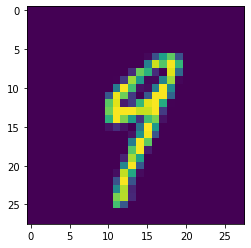

In [114]:
plt.imshow(random_image.reshape(28,28))

In [115]:
model.predict_classes(random_image.reshape(1,28,28,1))

array([9])